In [2]:
from circuitClass import *

<img src="pic/pic7.png" style="height:250px">

In [11]:
graph = [[0,1],[0,2],[1,2]]
C = [50*fF,25*fF,0]
L = [0,0,100*pH]
JJ = [0,0,192*GHz]

# define the circuit
cr1 = Qcircuit(graph,L,C,JJ)

# set excitation
phiExt = np.linspace(0,0.02,2)*2*np.pi
# phiExt = np.linspace(-0.02,0.02,15)*2*np.pi
cr1.setExcitation([([0,2,1],phiExt)])

# configure the circuit
cr1.configure()

In [12]:
cr1.setFockNumbers([13,13])

In [13]:
cr1.solveCircuit(showLoading=True)

0
1


In [24]:
for i in range(20):
    print(cr1.HamilEig[i,0].real/GHz-cr1.HamilEig[0,0].real/GHz)

0.0
2.066157741511091
2.066157741511091
8.264630966043484
8.264630966043796
18.595419673598343
18.595419673598343
33.05852386417479
33.05852386417479
51.65394353777327
51.65394353777356
74.38167869439347
74.38167869439347
130.19883781332464
132.2649955548355
132.26499555483576
138.46346877936813
138.4634687793684
148.79425748692307
148.79425748692307


Text(0, 0.5, '($\\omega_i$)GHz')

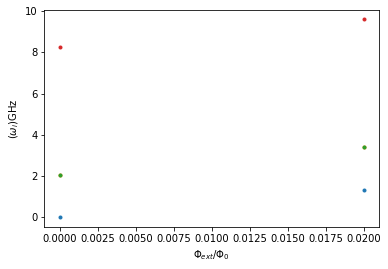

In [17]:
plt.figure()
for i in range(4):
    plt.plot(phiExt/2/np.pi,cr1.HamilEig[i,:].real/GHz-np.min(cr1.HamilEig[0,:]).real/GHz,'.')
plt.xlabel("$\Phi_{ext}/\Phi_0$")
plt.ylabel("($\omega_i$)GHz")

## Circuit Hamiltonian
In this section, I diogonalize the circuit Hamiltonian without using the Qcircuit Class. The corrected version of the Hamiltonian of the paper is:

$$
\begin{equation}
H = \hbar \omega a_{1}^{\dagger} a_{1}+ \frac{1}{2} \tilde{c}_{22}^{-1} \tilde{Q}_{2}^{2}-i \sqrt{\frac{\hbar}{2 Z_{1}}} \tilde{c}_{12}^{-1}\left(a_{1}-a_{1}^{\dagger}\right) \tilde{Q}_{3}-\frac{E_{J 12}}{2}\left(e^{i \phi_{\mathrm{var}}} D_{1}^{\dagger}\left(\alpha_{1}\right)+\mathrm{h.c.}\right) \\
\end{equation}
$$

In [19]:
R = np.array([[0,1],[1,1]])
RInv = np.linalg.inv(R)
Cx = cr1.giveMatC()
Lx = cr1.giveMatL()
_ ,S = np.linalg.eig(Lx)
lRotated = R @ Lx @ R 
cInvRotated = RInv @ np.linalg.inv(Cx) @ RInv
print("1st frequency:", np.sqrt(lRotated[0,0]*cInvRotated[0,0])/GHz)
print("2nd frequency:", 4*cInvRotated[1,1]*e**2/GHz/hbar)
Z = np.sqrt(cInvRotated[0,0]/lRotated[0,0])
omega = np.sqrt(np.diag(cInvRotated)*np.diag(lRotated))

1st frequency: 123.28088881229996
2nd frequency: 3.0992366122663912


In [28]:
m = 13
def Hamil(phi):
    I = q.qeye(m);
    num = q.num(m);
    charge = q.charge((m-1)/2)
    d = cr1.chargeDisp(m)
    intr = q.destroy(m) - q.create(m)
    d = d.dag()
    
    HLC = omega[0]*q.tensor(num,I) +\
    0.5*(2*e)**2*cInvRotated[1,1]/hbar*q.tensor(I,charge)*q.tensor(I,charge)*2-\
    1j*np.sqrt(1/(2*hbar*Z))*(2*e)*cInvRotated[0,1]*q.tensor(intr,charge)*np.sqrt(2)
    
    alpha = 1j*2*np.pi/Phi0*np.sqrt(hbar*Z/2)
    
    HJJ = -JJ[2]/2*np.exp(1j*phi)*q.tensor(q.displace(m,alpha),I)
    HJJ = HJJ + HJJ.dag()

    H = HLC + HJJ
    return H

In [29]:
HamilEig = np.zeros((m**2,len(phiExt)),dtype='complex');
for i in range(len(phiExt)):
    print(i)
    H = Hamil(phiExt[i]);
    eigenValues , eigenVectors = H.eigenstates();
    HamilEig[:,i] = eigenValues

0
1


In [30]:
for i in range(20):
    print(HamilEig[i,0].real/GHz-HamilEig[0,0].real/GHz)

0.0
2.066157741511091
2.0661577415113186
8.264630966043825
8.264630966044137
18.59541967359837
18.595419673598684
33.058523864175214
33.05852386417547
51.65394353778112
51.65394353778112
74.38167869447963
74.38167869447994
130.19883781332504
132.26499555483548
132.2649955548358
138.46346877936867
138.4634687793693
148.79425748693038
148.79425748693066


Text(0, 0.5, '($\\omega_i-\\omega_0$)GHz')

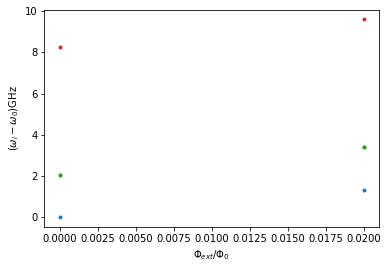

In [31]:
plt.figure()
for i in range(4):
    plt.plot(phiExt/2/np.pi,(HamilEig[(i),:].real/GHz-np.min(HamilEig[0,:]).real/GHz),'.')
plt.xlabel("$\Phi_{ext}/\Phi_0$")
plt.ylabel("($\omega_i-\omega_0$)GHz")

In [32]:
graph = [[1,3],[2,0],[2,3],[3,0],[1,2]]
C = [98.8*fF,15*fF,38.7*fF,67.5*fF,0]
L = [293*pH,0,98.1*pH,0,100*pH]
pi2 = 2*np.pi
JJ = [0,187*GHz/pi2,0,192*GHz/pi2,1865*GHz/pi2]

# define the circuit
cr2 = Qcircuit(graph,L,C,JJ)

R = np.array([[1,1,1],[1,0,1],[1,1,1]])

Lx = cr2.giveMatL()*pH
lRotated = R @ Lx @ R

In [33]:
lRotated

array([[4.33680869e-19, 4.33680869e-19, 4.33680869e-19],
       [0.00000000e+00, 2.01936799e-02, 0.00000000e+00],
       [4.33680869e-19, 4.33680869e-19, 4.33680869e-19]])

In [34]:
np.linspace(0,0.00001,2)

array([0.e+00, 1.e-05])

In [22]:
H = np.array([[10,-10],[-10,10]])
_,S = np.linalg.eig(H)
print(S)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
